<a href="https://colab.research.google.com/github/cardoner1993/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [43]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

# Setup random seed
RANDOM_SEED = 42

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [44]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_moons(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

print(f"Type X {type(X)}")
print(f"Type y {type(y)}")

Type X <class 'numpy.ndarray'>
Type y <class 'numpy.ndarray'>


In [45]:
# Turn data into a DataFrame
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
5,0.579542,-0.352979,1
6,0.294884,-0.209238,1
7,-0.014488,0.435896,1
8,1.626510,-0.281207,1
9,0.671598,0.786422,0


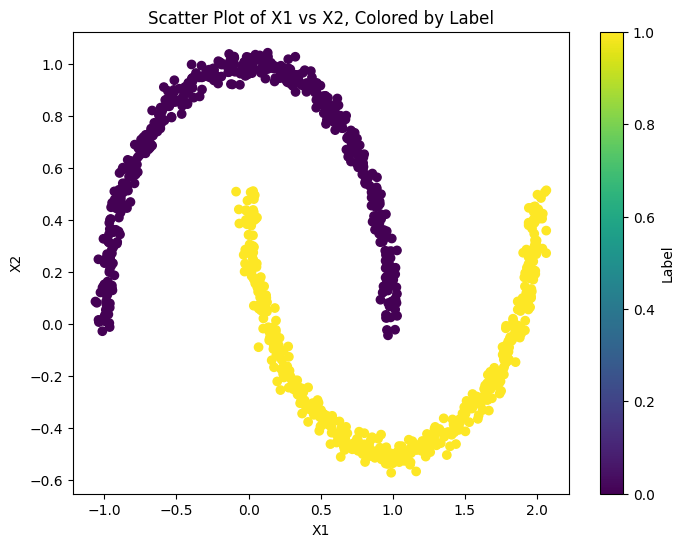

In [46]:
# prompt: Using dataframe circles: suggest a plot with matplotlib

import matplotlib.pyplot as plt

# Create a scatter plot of X1 vs X2, colored by the 'label' column
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(circles['X1'], circles['X2'], c=circles['label'], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2, Colored by Label')
plt.colorbar(label='Label') # Add a colorbar to show the mapping of colors to labels
plt.show()


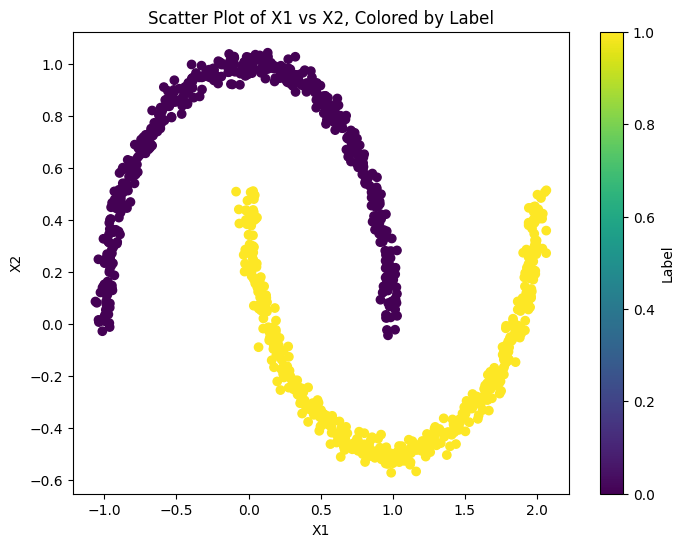

In [47]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

# Create a scatter plot of X1 vs X2, colored by the 'label' column
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(circles['X1'], circles['X2'], c=circles['label'], cmap='viridis')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of X1 vs X2, Colored by Label')
plt.colorbar(label='Label') # Add a colorbar to show the mapping of colors to labels
plt.show()


In [48]:
# Turn data into tensors of dtype float
# Otherwise this causes issues with computations later on
import torch
X_torch = torch.from_numpy(X).type(torch.float)
y_torch = torch.from_numpy(y).type(torch.float)

# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size=0.2, random_state=42)

print("X_train (first 5 rows):")
print(X_train[:5])
print("y_train (first 5 rows):")
print(y_train[:5])

print(y_train.shape)

X_train (first 5 rows):
tensor([[ 1.9758,  0.2076],
        [-0.9608,  0.4007],
        [-0.0986,  1.0231],
        [-0.1083,  0.9919],
        [ 0.3767, -0.2620]])
y_train (first 5 rows):
tensor([1., 0., 0., 0., 1.])
torch.Size([800])


## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [49]:
import torch
from torch import nn

# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [50]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [51]:
# Training loop
epochs = 300

# Send data to target device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train).squeeze(1)

  # 2. Calculate loss
  loss = loss_fn(y_train, y_pred)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Loss backwards
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()


  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    model_0.eval()

    # 1. Forward pass
    y_test_pred = model_0(X_test).squeeze(1)

    # 2. Calculate test loss
    test_loss = loss_fn(y_test, y_test_pred)

    # Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 1.132 | Test loss: 1.040
Epoch: 20 | Train loss: -3.162 | Test loss: -3.716
Epoch: 40 | Train loss: -59.914 | Test loss: -68.022
Epoch: 60 | Train loss: -940.438 | Test loss: -1066.234
Epoch: 80 | Train loss: -14710.750 | Test loss: -16675.900
Epoch: 100 | Train loss: -230168.719 | Test loss: -260906.109
Epoch: 120 | Train loss: -3601451.000 | Test loss: -4082357.000
Epoch: 140 | Train loss: -56352200.000 | Test loss: -63876800.000
Epoch: 160 | Train loss: -881747712.000 | Test loss: -999485120.000
Epoch: 180 | Train loss: -13796782080.000 | Test loss: -15639026688.000
Epoch: 200 | Train loss: -215879434240.000 | Test loss: -244705214464.000
Epoch: 220 | Train loss: -3377885085696.000 | Test loss: -3828923760640.000
Epoch: 240 | Train loss: -52854060482560.000 | Test loss: -59911505444864.000
Epoch: 260 | Train loss: -827012058972160.000 | Test loss: -937440499990528.000
Epoch: 280 | Train loss: -12940330588438528.000 | Test loss: -14668216332713984.000


In [52]:
# What's coming out of our model?

# logits (raw outputs of model)
print("Logits:")
## Your code here ##
print(y_test_pred)

# Prediction probabilities
print("Pred probs:")
## Your code here ##
y_pred_probs = torch.sigmoid(y_test_pred)
print(y_pred_probs)

# Prediction labels
print("Pred labels:")
## Your code here ##
y_pred_labels = torch.round(torch.sigmoid(y_test_pred))
print(y_pred_labels)

Logits:
tensor([ 2.3006e+16,  2.4400e+16,  3.3815e+16,  2.2186e+16,  4.2008e+16,
         4.3274e+16,  2.8635e+16,  2.9426e+16,  3.2863e+16,  2.3940e+16,
         2.1077e+16,  2.2302e+16,  2.9107e+16,  3.5866e+16,  1.1166e+16,
         4.2767e+16,  1.7144e+16,  1.8764e+16,  2.5108e+16,  1.6996e+16,
         2.3977e+16,  2.7505e+14,  2.6315e+16,  1.6712e+16,  2.6642e+16,
         2.8288e+16,  5.2430e+15, -1.0437e+14,  1.0616e+16,  3.7290e+16,
         1.4840e+16,  2.6516e+16,  2.1050e+16,  4.0723e+16,  2.0455e+16,
         1.8570e+16,  2.1205e+16,  3.4933e+16,  4.0042e+16,  3.6421e+16,
         2.6595e+16,  3.1518e+16,  1.6177e+16,  4.1450e+14,  2.0747e+16,
         1.7393e+16, -1.8315e+14,  2.3646e+16,  1.8011e+16,  4.3100e+16,
         2.1554e+16,  2.0972e+16, -3.2942e+14,  1.3984e+15,  1.3980e+16,
         5.1991e+15,  1.4148e+16,  3.4766e+16,  2.8518e+16,  1.3559e+16,
         4.2231e+16,  2.8456e+16,  1.4565e+16,  3.6465e+16,  2.1997e+16,
         1.8554e+16,  4.3133e+16, -2.1130e+

In [53]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [54]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000


# Send data to the device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


# Loop through the data
for epoch in range(epochs):
  ### Training
  model_0.train()

  # 1. Forward pass (logits output)
  y_logits = model_0(X_train).squeeze(1)

  # Turn logits into prediction probabilities
  y_pred_probs = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred_labels = torch.round(torch.sigmoid(y_logits))

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred_labels, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    # 1. Forward pass
    y_test_logits = model_0(X_test).squeeze(1)

    # Turn the test logits into prediction labels
    y_test_labels = torch.round(torch.sigmoid(y_test_logits))

    # 2. Calculaute the loss
    test_loss = loss_fn(y_test_logits, y_test) # loss = compare model raw outputs to desired model outputs

    # Calculate the accuracy
    test_acc = acc_fn(y_test_labels, y_test.int())


  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")
    print(f"Accuracy: {acc} | Test Accuracy: {test_acc:.3f}")


Epoch: 0 | Train loss: 89161571149807616.000 | Test loss: 90374942360600576.000
Accuracy: 0.5350000262260437 | Test Accuracy: 0.590
Epoch: 100 | Train loss: 1516424774287360.000 | Test loss: 1210578274091008.000
Accuracy: 0.8812500238418579 | Test Accuracy: 0.890
Epoch: 200 | Train loss: 776195213885440.000 | Test loss: 741944527421440.000
Accuracy: 0.8700000047683716 | Test Accuracy: 0.860
Epoch: 300 | Train loss: 559252657668096.000 | Test loss: 539261564616704.000
Accuracy: 0.8700000047683716 | Test Accuracy: 0.860
Epoch: 400 | Train loss: 402782234345472.000 | Test loss: 389474815049728.000
Accuracy: 0.8700000047683716 | Test Accuracy: 0.860
Epoch: 500 | Train loss: 289738997104640.000 | Test loss: 280134460375040.000
Accuracy: 0.8712499737739563 | Test Accuracy: 0.860
Epoch: 600 | Train loss: 207929181470720.000 | Test loss: 201012539293696.000
Accuracy: 0.8725000023841858 | Test Accuracy: 0.860
Epoch: 700 | Train loss: 148533592195072.000 | Test loss: 143598121123840.000
Accuracy

## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [55]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

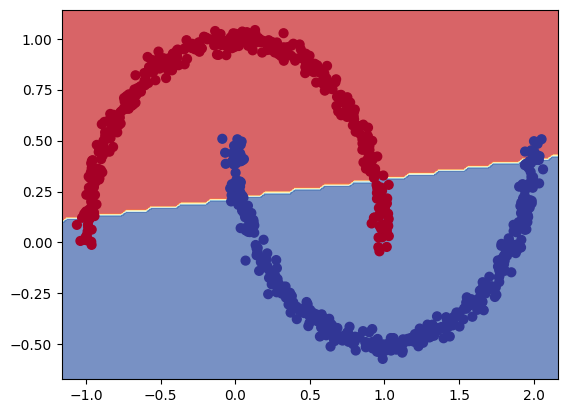

In [56]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_0, X_train, y_train)

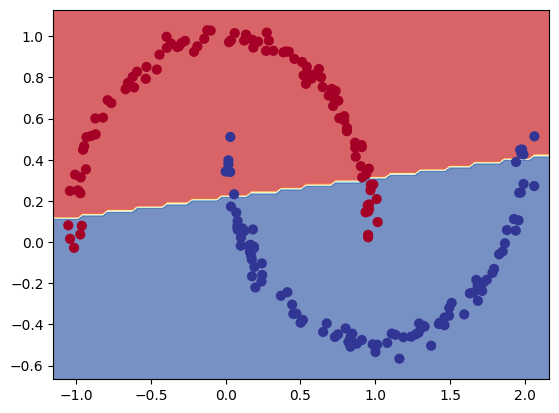

In [57]:
plot_decision_boundary(model_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [58]:
# Create a straight line tensor
x_lin = torch.linspace(-10, 10, 100)
print(x_lin)

tensor([-10.0000,  -9.7980,  -9.5960,  -9.3939,  -9.1919,  -8.9899,  -8.7879,
         -8.5859,  -8.3838,  -8.1818,  -7.9798,  -7.7778,  -7.5758,  -7.3737,
         -7.1717,  -6.9697,  -6.7677,  -6.5657,  -6.3636,  -6.1616,  -5.9596,
         -5.7576,  -5.5556,  -5.3535,  -5.1515,  -4.9495,  -4.7475,  -4.5455,
         -4.3434,  -4.1414,  -3.9394,  -3.7374,  -3.5354,  -3.3333,  -3.1313,
         -2.9293,  -2.7273,  -2.5253,  -2.3232,  -2.1212,  -1.9192,  -1.7172,
         -1.5152,  -1.3131,  -1.1111,  -0.9091,  -0.7071,  -0.5051,  -0.3030,
         -0.1010,   0.1010,   0.3030,   0.5051,   0.7071,   0.9091,   1.1111,
          1.3131,   1.5152,   1.7172,   1.9192,   2.1212,   2.3232,   2.5253,
          2.7273,   2.9293,   3.1313,   3.3333,   3.5354,   3.7374,   3.9394,
          4.1414,   4.3434,   4.5455,   4.7475,   4.9495,   5.1515,   5.3535,
          5.5556,   5.7576,   5.9596,   6.1616,   6.3636,   6.5657,   6.7677,
          6.9697,   7.1717,   7.3737,   7.5758,   7.7778,   7.97

In [59]:
# Test torch.tanh() on the tensor and plot it. Range from -1 to 1.
torch.tanh(x_lin)

tensor([-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
        -0.9999, -0.9999, -0.9998, -0.9998, -0.9997, -0.9995, -0.9992, -0.9989,
        -0.9983, -0.9975, -0.9962, -0.9943, -0.9915, -0.9873, -0.9810, -0.9717,
        -0.9579, -0.9375, -0.9078, -0.8651, -0.8045, -0.7207, -0.6088, -0.4661,
        -0.2941, -0.1007,  0.1007,  0.2941,  0.4661,  0.6088,  0.7207,  0.8045,
         0.8651,  0.9078,  0.9375,  0.9579,  0.9717,  0.9810,  0.9873,  0.9915,
         0.9943,  0.9962,  0.9975,  0.9983,  0.9989,  0.9992,  0.9995,  0.9997,
         0.9998,  0.9998,  0.9999,  0.9999,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,
         1.0000,  1.0000,  1.0000,  1.00

In [60]:
# Replicate torch.tanh() and plot it
def tanh(z):
	return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

cust_x_tanh = tanh(x_lin)

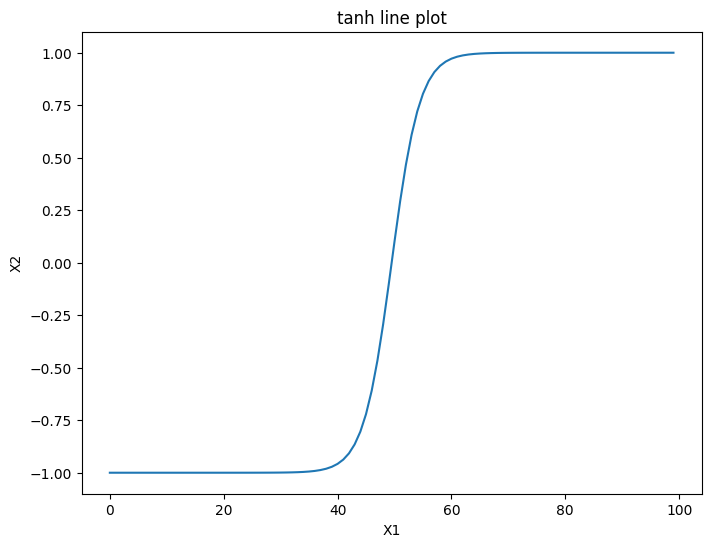

In [61]:
import matplotlib.pyplot as plt

# Create a scatter plot of X1 vs X2, colored by the 'label' column
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.plot(cust_x_tanh)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('tanh line plot')
plt.show()

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

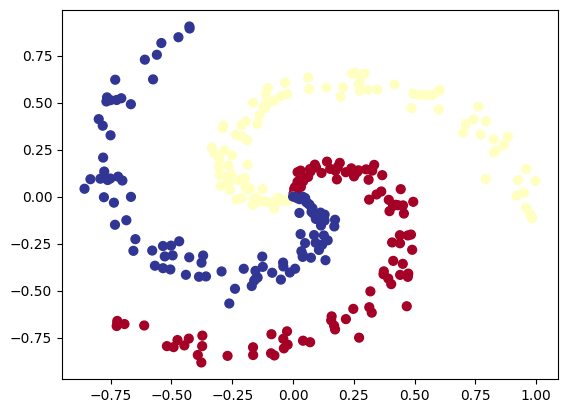

In [70]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [71]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=4).to(device)
acc_fn

MulticlassAccuracy()

In [65]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Create model by subclassing nn.Module
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=D,
                    output_features=K,
                    hidden_units=8).to(device)



In [72]:
# Setup data to be device agnostic
X = X.to(device)
y = y.to(device)

# Print out first 10 untrained model outputs (forward pass)
print("Logits:")
## Your code here ##
y_logits = model_4(X[:10])
print(y_logits)

print("Pred probs:")
## Your code here ##
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_pred_probs, "Shape", y_pred_probs.shape)

print("Pred labels:")
## Your code here ## Shape to dim of the output.
y_pred_labels = torch.argmax(y_pred_probs, dim=1)
print(y_pred_labels)

Logits:
tensor([[-0.0711, -0.3803, -0.2443],
        [-0.0713, -0.3809, -0.2453],
        [-0.0718, -0.3820, -0.2465],
        [-0.0726, -0.3834, -0.2478],
        [-0.0721, -0.3832, -0.2483],
        [-0.0726, -0.3842, -0.2495],
        [-0.0746, -0.3872, -0.2516],
        [-0.0747, -0.3876, -0.2525],
        [-0.0739, -0.3871, -0.2529],
        [-0.0759, -0.3900, -0.2550]], device='cuda:0',
       grad_fn=<AddmmBackward0>)
Pred probs:
tensor([[0.3883, 0.2851, 0.3266],
        [0.3885, 0.2850, 0.3265],
        [0.3886, 0.2850, 0.3264],
        [0.3888, 0.2849, 0.3263],
        [0.3889, 0.2850, 0.3261],
        [0.3891, 0.2849, 0.3260],
        [0.3892, 0.2847, 0.3261],
        [0.3894, 0.2847, 0.3259],
        [0.3895, 0.2848, 0.3257],
        [0.3896, 0.2846, 0.3257]], device='cuda:0', grad_fn=<SoftmaxBackward0>) Shape torch.Size([10, 3])
Pred labels:
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')


In [73]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), lr=0.1)

In [74]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

# Setup epochs
epochs = 1000

# Send data to the device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


# Loop through the data
for epoch in range(epochs):
  ### Training
  model_4.train()

  # 1. Forward pass (logits output)
  y_logits = model_4(X_train)

  # Turn logits into prediction probabilities
  y_pred_probs = torch.softmax(y_logits, dim=1)

  # Turn prediction probabilities into prediction labels
  y_pred_labels = torch.argmax(y_pred_probs, dim=1)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred_labels, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    # 1. Forward pass
    y_test_logits = model_4(X_test)

    # Turn the test logits into prediction labels
    y_test_labels = torch.argmax(torch.softmax(y_test_logits, dim=1), dim=1)

    # 2. Calculaute the loss
    test_loss = loss_fn(y_test_logits, y_test) # loss = compare model raw outputs to desired model outputs

    # Calculate the accuracy
    test_acc = acc_fn(y_test_labels, y_test.int())


  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")
    print(f"Accuracy: {acc} | Test Accuracy: {test_acc:.3f}")


Epoch: 0 | Train loss: 1.102 | Test loss: 1.087
Accuracy: 0.32499998807907104 | Test Accuracy: 0.367
Epoch: 100 | Train loss: 0.983 | Test loss: 1.001
Accuracy: 0.5541666746139526 | Test Accuracy: 0.417
Epoch: 200 | Train loss: 0.852 | Test loss: 0.865
Accuracy: 0.5416666865348816 | Test Accuracy: 0.433
Epoch: 300 | Train loss: 0.737 | Test loss: 0.755
Accuracy: 0.5916666388511658 | Test Accuracy: 0.533
Epoch: 400 | Train loss: 0.671 | Test loss: 0.694
Accuracy: 0.5874999761581421 | Test Accuracy: 0.550
Epoch: 500 | Train loss: 0.622 | Test loss: 0.654
Accuracy: 0.637499988079071 | Test Accuracy: 0.583
Epoch: 600 | Train loss: 0.574 | Test loss: 0.612
Accuracy: 0.675000011920929 | Test Accuracy: 0.617
Epoch: 700 | Train loss: 0.531 | Test loss: 0.570
Accuracy: 0.7124999761581421 | Test Accuracy: 0.667
Epoch: 800 | Train loss: 0.493 | Test loss: 0.529
Accuracy: 0.7166666388511658 | Test Accuracy: 0.717
Epoch: 900 | Train loss: 0.460 | Test loss: 0.485
Accuracy: 0.7416666746139526 | Test

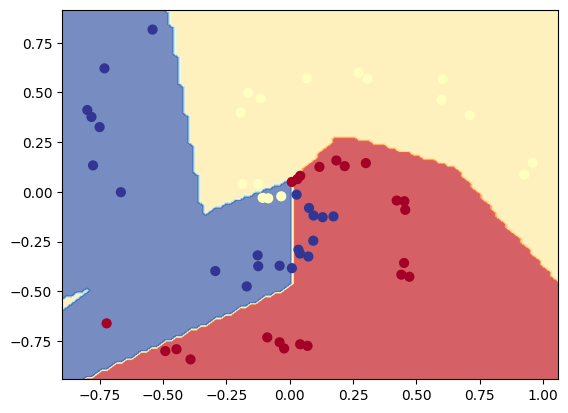

In [75]:
# Plot decision boundaries for training and test sets
plot_decision_boundary(model_4, X_test, y_test)